In [16]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import h5py

from keras import callbacks 
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.layers import Dense

from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten

# Load data

In [17]:
#I use the same dataset used for DNN model
#loading data--------------------------------------------------------------------------------------
img=np.load('DNNtrain32_new1.npy')
lb=np.load('DNNtrain_label32_new1.npy')

print('The shape of trainset image is ',img.shape)
print('The shape of trainset label is ',lb.shape)


The shape of trainset image is  (23750, 32, 32, 3)
The shape of trainset label is  (23750, 1024)


In [18]:
test_img=np.load('DNNtest32_new1.npy')
test_lb=np.load('DNNtest_label32_new1.npy')

print('The shape of testset image is ',test_img.shape)
print('The shape of testset label is ',test_lb.shape)


The shape of testset image is  (5950, 32, 32, 3)
The shape of testset label is  (5950, 1024)


# Transfer learning MobileNetV2

In [19]:
# Specify the pre-trained model MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(32,32,3),include_top=False)

In [20]:
# Preprocesses a tensor or Numpy array encoding a batch of images.
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [21]:
base_model.trainable = False

In [29]:
## Build the transfer learning model uisng Functional API

inputs = tf.keras.Input(shape=(32,32,3))
x=preprocess_input(inputs)
x=base_model(x,training=False)
x=global_average_layer(x)
output=tf.keras.layers.Dense(32*32)(x)
TransModel = tf.keras.Model(inputs,output)
TransModel.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['MeanSquaredError'])

In [32]:
#train the model 
#earlystopping to find the optimal number of epochs 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                            mode ="min", patience = 25,  
                                            restore_best_weights = True,
                                           verbose=1) 
eps=2000
bsize=8
TransModel.fit(img,lb,validation_split=0.1, epochs=eps, batch_size=bsize,callbacks=[earlystopping])

Epoch 1/2000
2672/2672 [==============================] - 29s 11ms/step - loss: 11.6275 - mean_squared_error: 11.6275 - val_loss: 10.4816 - val_mean_squared_error: 10.4816
Epoch 2/2000
2672/2672 [==============================] - 28s 10ms/step - loss: 9.8563 - mean_squared_error: 9.8563 - val_loss: 9.8032 - val_mean_squared_error: 9.8032
Epoch 3/2000
2672/2672 [==============================] - 28s 11ms/step - loss: 9.2782 - mean_squared_error: 9.2782 - val_loss: 9.3344 - val_mean_squared_error: 9.3344
Epoch 4/2000
2672/2672 [==============================] - 28s 10ms/step - loss: 9.0006 - mean_squared_error: 9.0006 - val_loss: 9.1330 - val_mean_squared_error: 9.1330
Epoch 5/2000
2672/2672 [==============================] - 28s 10ms/step - loss: 8.8285 - mean_squared_error: 8.8285 - val_loss: 9.0756 - val_mean_squared_error: 9.0756
Epoch 6/2000
2672/2672 [==============================] - 27s 10ms/step - loss: 8.7082 - mean_squared_error: 8.7082 - val_loss: 9.0493 - val_mean_squared_er

2672/2672 [==============================] - 28s 10ms/step - loss: 7.9373 - mean_squared_error: 7.9373 - val_loss: 8.2380 - val_mean_squared_error: 8.2380
Epoch 50/2000
2672/2672 [==============================] - 28s 10ms/step - loss: 7.9297 - mean_squared_error: 7.9297 - val_loss: 8.2239 - val_mean_squared_error: 8.2239
Epoch 51/2000
2672/2672 [==============================] - 28s 10ms/step - loss: 7.9243 - mean_squared_error: 7.9243 - val_loss: 8.2146 - val_mean_squared_error: 8.2146
Epoch 52/2000
2672/2672 [==============================] - 28s 10ms/step - loss: 7.9184 - mean_squared_error: 7.9184 - val_loss: 8.3109 - val_mean_squared_error: 8.3109
Epoch 53/2000
2672/2672 [==============================] - 27s 10ms/step - loss: 7.9131 - mean_squared_error: 7.9131 - val_loss: 8.2725 - val_mean_squared_error: 8.2725
Epoch 54/2000
2672/2672 [==============================] - 28s 10ms/step - loss: 7.9073 - mean_squared_error: 7.9073 - val_loss: 8.2776 - val_mean_squared_error: 8.2776


2672/2672 [==============================] - 29s 11ms/step - loss: 7.7508 - mean_squared_error: 7.7508 - val_loss: 8.1045 - val_mean_squared_error: 8.1045
Epoch 98/2000
2672/2672 [==============================] - 29s 11ms/step - loss: 7.7489 - mean_squared_error: 7.7489 - val_loss: 8.1612 - val_mean_squared_error: 8.1612
Epoch 99/2000
2672/2672 [==============================] - 29s 11ms/step - loss: 7.7478 - mean_squared_error: 7.7478 - val_loss: 8.0341 - val_mean_squared_error: 8.0341
Epoch 100/2000
2672/2672 [==============================] - 29s 11ms/step - loss: 7.7448 - mean_squared_error: 7.7448 - val_loss: 8.0239 - val_mean_squared_error: 8.0239
Epoch 101/2000
2672/2672 [==============================] - 28s 11ms/step - loss: 7.7432 - mean_squared_error: 7.7432 - val_loss: 8.1323 - val_mean_squared_error: 8.1323
Epoch 102/2000
2672/2672 [==============================] - 28s 11ms/step - loss: 7.7420 - mean_squared_error: 7.7420 - val_loss: 8.0421 - val_mean_squared_error: 8.04

2672/2672 [==============================] - 28s 11ms/step - loss: 7.6872 - mean_squared_error: 7.6872 - val_loss: 7.9684 - val_mean_squared_error: 7.9684
Epoch 146/2000
2672/2672 [==============================] - 28s 11ms/step - loss: 7.6857 - mean_squared_error: 7.6857 - val_loss: 8.0204 - val_mean_squared_error: 8.0204
Epoch 147/2000
2672/2672 [==============================] - 29s 11ms/step - loss: 7.6851 - mean_squared_error: 7.6851 - val_loss: 8.0043 - val_mean_squared_error: 8.0043
Epoch 148/2000
2672/2672 [==============================] - 28s 11ms/step - loss: 7.6844 - mean_squared_error: 7.6844 - val_loss: 8.0392 - val_mean_squared_error: 8.0392
Epoch 149/2000
2672/2672 [==============================] - 28s 11ms/step - loss: 7.6843 - mean_squared_error: 7.6843 - val_loss: 8.0093 - val_mean_squared_error: 8.0093
Epoch 150/2000
2672/2672 [==============================] - 29s 11ms/step - loss: 7.6824 - mean_squared_error: 7.6824 - val_loss: 8.0132 - val_mean_squared_error: 8.

In [33]:
TransModel.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
tf_op_layer_RealDiv_5 (Tenso [(None, 32, 32, 3)]       0         
_________________________________________________________________
tf_op_layer_Sub_5 (TensorFlo [(None, 32, 32, 3)]       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1311744   
Total params: 3,569,728
Trainable params: 1,311,744
Non-trainable params: 2,257,984
____________________________________

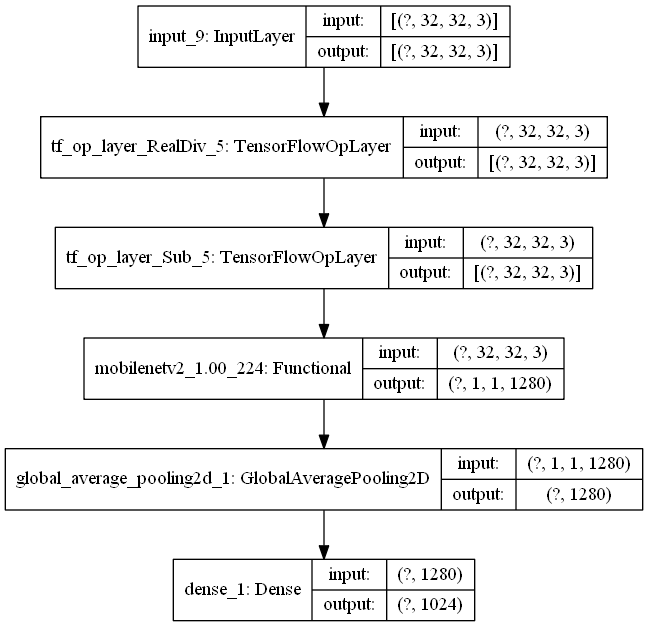

In [34]:
tf.keras.utils.plot_model(TransModel,
                          show_shapes=True,
                          show_layer_names=True, 
                          rankdir='TB', expand_nested=False)

In [35]:
TransModel.evaluate(test_img, test_lb)

186/186 [==============================] - 4s 20ms/step - loss: 7.9891 - mean_squared_error: 7.9891


[7.989144802093506, 7.989144802093506]

# Plot a sample prediction and the corresponding ground truth


In [36]:
predictions=TransModel.predict(test_img)
assert predictions.shape==test_lb.shape

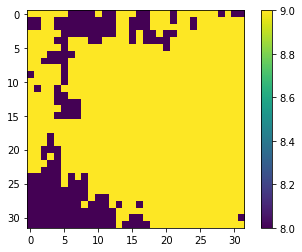

In [39]:
#Plot a sample prediction generated by using testset
sample=np.round(predictions[6]).reshape(32,32)

plt.imshow(sample)
plt.colorbar()
plt.show()

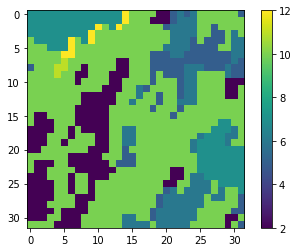

In [40]:
#Plot the corresponding label  of the testset
b=test_lb[6].reshape(32,32)

plt.imshow(b)
plt.colorbar()
plt.show()

In [23]:
#Global Average Pooling layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch = base_model(img)
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)
print(feature_batch.shape)
#it has 1280 channels in the pretrained model
# this is the inputs (16,2,2, 1280) before flatten layer, 
# to convert it to 1D, then pass it to a classification algorithm

(23750, 1280)
(23750, 1, 1, 1280)
